In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
df = pd.read_csv('dataset.csv')
df = df.dropna()

In [14]:
features = ['tipo', 'ano_registo', 'caixa', 'potencia', 'km', 'combustivel', 'marca', 'com_danos', 'preco']
data = df[features]
data = pd.get_dummies(data, columns=['tipo', 'caixa', 'combustivel', 'marca', 'com_danos'], drop_first=True)

X = data.drop(['preco'], axis=1)
y = data['preco']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

rf_model = RandomForestRegressor(n_estimators=200, max_depth=18, max_features=6, random_state=96)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features=6, n_estimators=200,
                      random_state=96)

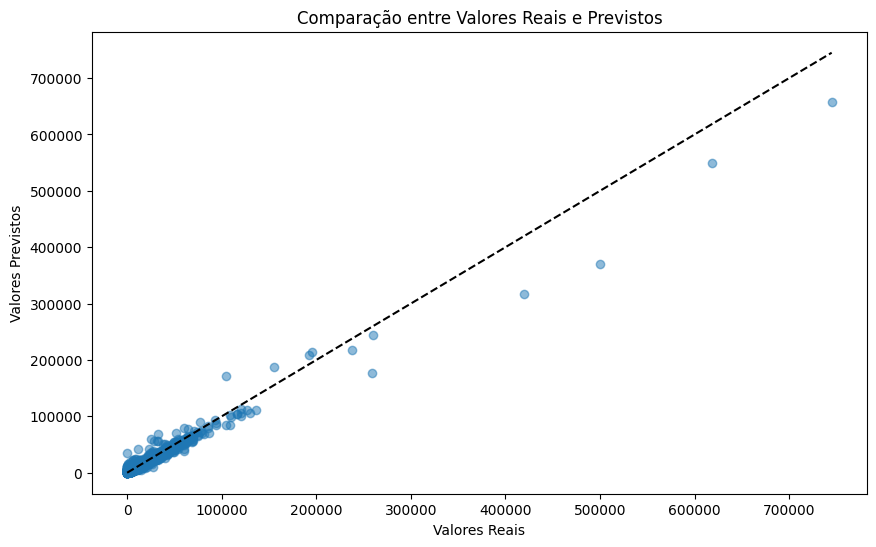

In [16]:
y_train_pred = rf_model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

In [17]:
importances = rf_model.feature_importances_

# Criar um DataFrame com as importâncias das features e os seus nomes
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

marca_columns = [col for col in feature_importance_df['Feature'] if col.startswith('marca_')]
marca_importance = feature_importance_df[feature_importance_df['Feature'].isin(marca_columns)]['Importance'].sum()

tipo_columns = [col for col in feature_importance_df['Feature'] if col.startswith('tipo_')]
tipo_importance = feature_importance_df[feature_importance_df['Feature'].isin(tipo_columns)]['Importance'].sum()

caixa_columns = [col for col in feature_importance_df['Feature'] if col.startswith('caixa_')]
caixa_importance = feature_importance_df[feature_importance_df['Feature'].isin(caixa_columns)]['Importance'].sum()

combustivel_columns = [col for col in feature_importance_df['Feature'] if col.startswith('combustivel_')]
combustivel_importance = feature_importance_df[feature_importance_df['Feature'].isin(combustivel_columns)]['Importance'].sum()

com_danos_columns = [col for col in feature_importance_df['Feature'] if col.startswith('com_danos_')]
com_danos_importance = feature_importance_df[feature_importance_df['Feature'].isin(com_danos_columns)]['Importance'].sum()

cols_of_interest_1 = ["ano_registo", "potencia", "km"]
filtered_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(cols_of_interest_1)]

# Criar um DataFrame com as colunas do dataset e os valores da importância
cols_of_interest = ["tipo", "caixa", "combustivel", "marca", "com_danos"]
extra_importance_df = pd.DataFrame({'Feature': cols_of_interest, 'Importance': [tipo_importance, caixa_importance, combustivel_importance, marca_importance, com_danos_importance]})

# Concatenar o DataFrame extra com o DataFrame de importância filtrado
final_importance_df = pd.concat([filtered_importance_df, extra_importance_df])

# Ordenar o DataFrame por importância em ordem decrescente
final_importance_df = final_importance_df.sort_values(by='Importance', ascending=False)

# DataFrame filtrado
print(final_importance_df)

       Feature  Importance
1     potencia    0.326587
0  ano_registo    0.258235
2           km    0.219731
0         tipo    0.065986
1        caixa    0.060568
3        marca    0.052987
2  combustivel    0.010304
4    com_danos    0.005602


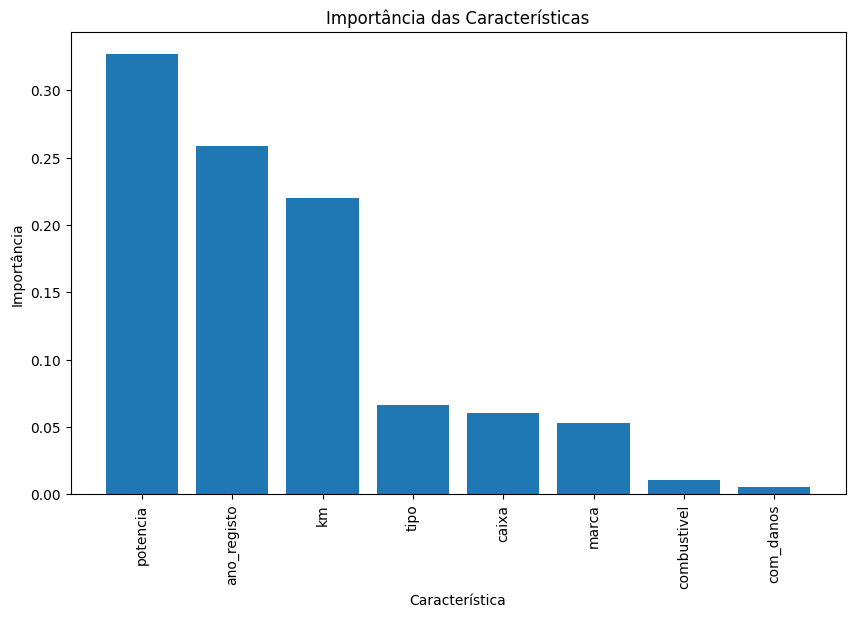

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(final_importance_df['Feature'], final_importance_df['Importance'])
plt.ylabel('Importância')
plt.xlabel('Característica')
plt.title('Importância das Características')
plt.xticks(rotation=90)
plt.show()


In [22]:
# Fazer predictions na test data
y_pred = rf_model.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head(5))
print("----------------------------")

# Avaliar o modelo
r2 = metrics.r2_score(y_test, y_pred)
print(f'R²: {r2}')

score = rf_model.score(X=X_train, y=y_train)
print(f'O score do modelo: {score}')

       Actual     Predicted
2552     6920   4628.869243
6400     8420   8190.986785
12673   11079  13399.930706
7303    17530  15713.932037
22540    1790   2890.608057
----------------------------
R²: 0.8786422983552844
O score do modelo: 0.9656806980437962


In [20]:
ourModel = RandomForestRegressor(random_state=96)

grid_values = {
    'max_features': [6],
    'n_estimators': [100,150,200],
    'max_depth': [18]
}

#Cria o objeto GridSearchCV
searchOurModel = GridSearchCV(ourModel, grid_values, cv=10)

searchOurModel.fit(X=X_train, y=y_train)

# Mostrar os melhores parametros descobretos pelo GridSearchCV
print("Melhores Parametros: ", searchOurModel.best_params_)

# Aceder ao melhor modelo encontrado pelo GridSearchCV
bestOurModel = searchOurModel.best_estimator_

# Mostrar o score do melhor modelo da training data
print("Best Model Score on Training Data: ", bestOurModel.score(X=X_train, y=y_train))

Melhores Parametros:  {'max_depth': 18, 'max_features': 6, 'n_estimators': 200}
Best Model Score on Training Data:  0.9656806980437962


In [21]:
# Carreguar o conjunto de características das viaturas a serem estimadas
just_features = pd.read_csv('just_features.csv')

# Adicionar os IDs dos veículos ao DataFrame
estimated_prices_file = pd.DataFrame({'id': just_features['id']})

# Pré-processamento dos novos dados
estimated_prices_df = pd.get_dummies(just_features, columns=['tipo', 'caixa', 'combustivel', 'marca', 'com_danos'], drop_first=True)

# Realizar a previsão dos preços das viaturas com base nas suas características
predicted_prices = rf_model.predict(estimated_prices_df.drop('id', axis=1))

# Arredondar os valores para inteiros
predicted_prices = predicted_prices.astype(int)

# Adicionar as previsões de preço ao DataFrame
estimated_prices_file['preco_estimado'] = predicted_prices

# Guardar o resultado em um arquivo CSV
estimated_prices_file.to_csv('precos_estimados.csv', index=False)